In [1]:
import numpy as np
arr = np.array([1, 2, 3])
print(arr)
print(arr.shape)
print(arr.ndim)
print(arr.size)
print("-----------------------")
print(" arr[np.newaxis, :]  ")
arr_1 = arr[np.newaxis, :]
print(arr_1.shape)
print(arr_1.ndim)
print(arr_1)
print("-----------------------")
print(" arr[:, np.newaxis]  ")
arr_2 = arr[:, np.newaxis]
print(arr_2.shape)
print(arr_2.ndim)
print(arr_2)

[1 2 3]
(3,)
1
3
-----------------------
 arr[np.newaxis, :]  
(1, 3)
2
[[1 2 3]]
-----------------------
 arr[:, np.newaxis]  
(3, 1)
2
[[1]
 [2]
 [3]]


# Q1

In [7]:
def element_wise_comparison(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """
    
    # ------------
    # FILL THIS IN
    # greater_result = np.array(array1 > array2) # The > operator can be used as a shorthand for np.greater on ndarrays.
    # greater_equal_result = np.array(array1 >= array2)
    # less_result = np.array(array1 < array2)
    # less_equal_result = np.array(array1 <= array2)
    # using numpy functions for comparison
    greater_result = np.greater(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.greater.html
    greater_equal_result = np.greater_equal(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.greater.html
    less_result = np.less(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.less.html
    less_equal_result = np.less_equal(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.less_equal.html
    # ------------

    return greater_result, greater_equal_result, less_result, less_equal_result

In [11]:
array1 = np.array([ [1, 2],
                    [3, 4]])
array2 = np.array([ [1, 2],
                    [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparison(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [21]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """
    # ------------
    # FILL THIS IN
    if ( method == "element-wise" ):
        # result = array1 * array2 # The * operator can be used as a shorthand for np.multiply on ndarrays.
        # using numpy function
        result = np.multiply(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.multiply.html
    elif ( method == "matrix-multiply" ):
        # result = array1 @ array2 # The @ operator can be used as a shorthand for np.matmul on ndarrays.
        # using numpy function
        result = np.matmul(array1, array2) # https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
    else:
        raise ValueError("Invalid multiplication method: {}".format(method))
    # ------------

    return result

In [23]:
array1 = np.array([ [1, 2],
                    [3, 4]])
array2 = np.array([ [2, 0],
                    [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

# # Perform multiplication using an invalid method
# try:
#     invalid_result = array_multiply(array1, array2, method="invalid")
# except ValueError as e:
#     print("Invalid method:")
#     print(e)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [2]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.
    
    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    # ------------
    # FILL THIS IN
    if ( method == "column-wise" ):
        # if the shapes are incompatible for the chosen method.
        if ( p.shape[0] != q.shape[0] ):
            raise ValueError("The shapes are incompatible for the chosen method.")
        result = np.add(p, q[:, np.newaxis]) # https://numpy.org/doc/stable/user/basics.broadcasting.html
        
        # q_row_wise = np.broadcast_to(q, (q.shape[0], p.shape[1])) # https://numpy.org/doc/stable/reference/generated/numpy.broadcast_to.html
        # result = np.add(p, q_row_wise)
    elif ( method == "row-wise" ):
        # if the shapes are incompatible for the chosen method.
        if ( p.shape[1] != q.shape[0] ):
            raise ValueError("The shapes are incompatible for the chosen method.")
        result = np.add(p, q[np.newaxis, :])
    else:
        raise ValueError("Invalid addition method: {}".format(method))
    # ------------
    
    return result

In [3]:
# Example usage with different-shaped arrays
p = np.array([  [1, 2, 3], 
                [4, 5, 6], 
                [7, 8, 9]])
q = np.array([10, 20, 30])

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

# # Add q using an invalid method
# try:
#     invalid_result = broadcast_add(p, q, method="invalid")
# except ValueError as e:
#     print("Invalid method:")
#     print(e)

Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [33]:
# Initialize the random matrix

# np.random.seed(256)
x = np.random.randint(1, 11, (4, 4)) # we used 11 because the upper bound is exclusive ("half-open" interval [low, high))
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

print("Original Array:")
print(x)

# Do the normalization
max = np.max(x)
min = np.min(x)
x = (x - min) / (max - min)

# from sklearn import preprocessing as pre # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# x = pre.MinMaxScaler().fit_transform(x) # src: https://www.statology.org/numpy-normalize-between-0-and-1/

print("After normalization:")
print(x)

Original Array:
[[ 3  1  4  5]
 [ 7  1  3  2]
 [ 9 10  6 10]
 [ 3  8  8  2]]
After normalization:
[[0.22222222 0.         0.33333333 0.44444444]
 [0.66666667 0.         0.22222222 0.11111111]
 [0.88888889 1.         0.55555556 1.        ]
 [0.22222222 0.77777778 0.77777778 0.11111111]]


# Q5

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# You should write your code here and print or plot the required data asked in homework documentation

# read csv file in panda data frame
dataframe = pd.read_csv("./data.csv")
dataframe.head()

,Date,Closing Price
0,1/1/2023,101.026151
1,1/2/2023,100.809454
2,1/3/2023,102.211794
3,1/4/2023,103.324239
4,1/5/2023,100.833203


In [15]:
# Calculate daily returns
dataframe['Daily Return'] = dataframe['Closing Price'].pct_change() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
dataframe['Daily Return'] = dataframe['Closing Price'].diff() / dataframe['Closing Price'].shift(1) # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
dataframe['Daily Return'] = (dataframe['Closing Price'] - dataframe['Closing Price'].shift(1)) / dataframe['Closing Price'].shift(1)
dataframe.head()

,Date,Closing Price,Daily Return
0,1/1/2023,101.026151,NaN
1,1/2/2023,100.809454,-0.002145
2,1/3/2023,102.211794,0.013911
3,1/4/2023,103.324239,0.010884
4,1/5/2023,100.833203,-0.024109


In [16]:
# Calculate average daily return
avg_return = dataframe['Daily Return'].mean()
print('Average Daily Return is: ', avg_return)

Average Daily Return is:  0.0005548260008486658


In [17]:
# Calculate standard deviation 
std_dev = dataframe['Daily Return'].std()
print('Standard Deviation of Daily Return is: ', std_dev)

Standard Deviation of Daily Return is:  0.009455978850317192


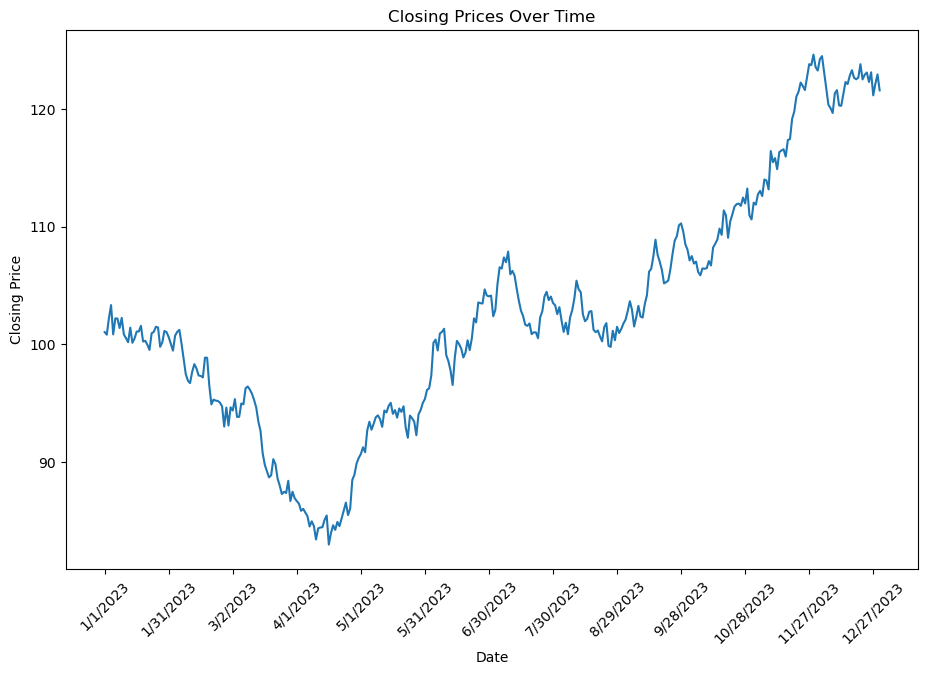

In [31]:
# Plot daily closing prices over time
plt.figure(figsize=(11, 7))
plt.plot(dataframe['Date'], dataframe['Closing Price'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.ylabel('Closing Price')
plt.show()

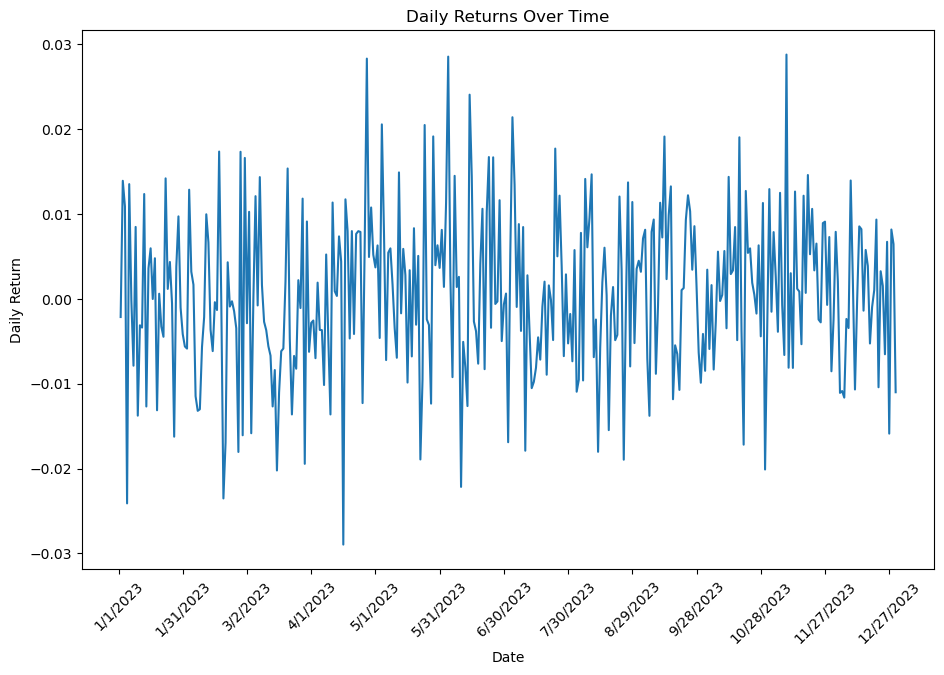

In [33]:
# Plot daily returns over time
plt.figure(figsize=(11, 7))
plt.plot(dataframe['Date'], dataframe['Daily Return'])
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15)) # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axis.XAxis.set_major_locator.html
plt.ylabel('Daily Return')
plt.show()

In [58]:
# Find days with the highest and lowest returns
highest_return_index = dataframe['Daily Return'].idxmax()
highest_return_date = dataframe.loc[highest_return_index, 'Date']
highest_return_value = dataframe.loc[highest_return_index, 'Daily Return']
# highest_return_value = dataframe['Daily Return'].max()

lowest_return_index = dataframe['Daily Return'].idxmin()
lowest_return_date = dataframe.loc[lowest_return_index, 'Date']
lowest_return_value = dataframe.loc[lowest_return_index, 'Daily Return']
# lowest_return_value = dataframe['Daily Return'].min()

print(f"Highest daily return is  {highest_return_value:0.9f} on '{highest_return_date}'")
print(f"Lowest  daily return is {lowest_return_value:0.9f} on '{lowest_return_date}'")

Highest daily return is  0.028786338 on '11/9/2023'
Lowest  daily return is -0.028963575 on '4/16/2023'


In [63]:
# Find the date and value of the highest and lowest historical stock prices
# Find days with the highest and lowest returns
highest_price_index = dataframe['Closing Price'].idxmax()
highest_price_date = dataframe.loc[highest_price_index, 'Date']
highest_price_value = dataframe.loc[highest_price_index, 'Closing Price']
# highest_price_value = dataframe['Closing Price'].max()

lowest_price_index = dataframe['Closing Price'].idxmin()
lowest_price_date = dataframe.loc[lowest_price_index, 'Date']
lowest_price_value = dataframe.loc[lowest_price_index, 'Closing Price']
# lowest_price_value = dataframe['Closing Price'].min()

print(f"Highest closing price is  {highest_price_value:0.9f} on '{highest_price_date}'")
print(f"Lowest  closing price is   {lowest_price_value:0.9f} on '{lowest_price_date}'")

Highest closing price is  124.618010800 on '11/29/2023'
Lowest  closing price is   82.968210120 on '4/16/2023'


# Q6

In [3]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    # ------------
    # FILL THIS IN
    num_samples, num_features = X.shape
    outputs = np.zeros((num_samples, 1))
    
    for i in range(0, num_samples):
        x_i = X[i, :]
        y_i = .0
        for j in range(0, num_features):
            y_i += x_i[j] * w[j]
        outputs[i] = y_i
    # ------------

    return outputs

def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    # ------------
    # FILL THIS IN
    # shape: (num_samples, num_features),(num_features, 1) -> (num_samples, 1)
    # outputs = np.matmul(X, w) # https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
    outputs = np.dot(X, w)
    # ------------

    return outputs

In [5]:
import time

# generate random samples
num_samples = 1000
num_features = 500

X = np.random.random((num_samples, num_features))
w = np.random.random((num_features, 1))

start_time = time.time()
outputs = for_loop_feed_forward(X, w)

print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)
# for_loop_feed_forward_time = time.time() - start_time

start_time = time.time()
outputs = vectorized_feed_forward(X, w)

print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)
# vectorized_feed_forward_time = time.time() - start_time

# # print how many times faster vectorization is
# print("Vectorization is {} times faster than for loops.".format(for_loop_feed_forward_time / vectorized_feed_forward_time))

# # assure outputs are equal
# assert np.allclose(outputs1, outputs2)

Time spent on calculating the outputs using for loops: 
4.16233491897583
Time spent on calculating the outputs using vectorization: 
0.0


# Q7

In [19]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """
    # ------------
    # FILL THIS IN
    # modified_arr = (array > threshold).astype(int) # bool -> int
    # modified_arr = np.greater(array, threshold).astype(int) # https://numpy.org/doc/stable/reference/generated/numpy.greater.html
    modified_arr = np.where(array > threshold, 1, 0) # https://numpy.org/doc/stable/reference/generated/numpy.where.html
    # ------------

    return modified_arr

In [20]:
input_array = np.array([[1, 2, 3], 
                        [4, 5, 6], 
                        [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[0 0 0]
 [0 0 1]
 [1 1 1]]


# Q8

In [2]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        # ------------
        # FILL THIS IN
        self.matrix = matrix # lists of lists 2D
        self.rows = len(matrix)
        self.columns = len(matrix[0])
        # self.matrix = np.array(matrix)
        # ------------
    
    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.matrix])

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """
        # ------------
        # FILL THIS IN
        if ( (self.rows != second_matrix.rows) or (self.columns != second_matrix.columns) ):
            return False
        ## without numpy 2-D matrix case:
        num_of_rows, num_of_cols = self.rows, self.columns
        for row in range(num_of_rows):
            for col in range(num_of_cols):
                if (self.matrix[row][col] != second_matrix.matrix[row][col]):
                    return False
        return True
        
        # --------------------------------------- #
        # if (self.matrix.shape != second_matrix.matrix.shape):
        #     return False
        ## with numpy:
        # if ( np.equal(self.matrix, second_matrix.matrix).all() ):
        #     return True
        # else:
        #     return False
        # # --------------------------------------- #
        # ## without numpy general N-dimensional matrix case: # src: https://stackoverflow.com/questions/45737880/how-to-iterate-over-this-n-dimensional-dataset
        # import itertools
        # # shape = self.matrix.shape
        # shape = [self.rows, self.columns]
        # # for idx, value in np.ndenumerate(self.matrix):
        # for idx in itertools.product(*[range(s) for s in shape]):
        #     if (self.matrix[idx] != second_matrix.matrix[idx]):
        #         return False
        # return True
        # # ------------

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        # ------------
        # FILL THIS IN
        if ((self.rows != second_matrix.rows) or (self.columns != second_matrix.columns)):
            ValueError("Matrices must have the same dimensions for element comparison.")

        # without numpy 2-D matrix case:
        higher_matrix = []
        num_of_rows, num_of_cols = self.rows, self.columns
        for row in range(num_of_rows):
            for col in range(num_of_cols):
                if (self.matrix[row][col] > second_matrix.matrix[row][col]):
                    higher_matrix[row][col] = True
                else:
                    higher_matrix[row][col] = False
        
        # --------------------------------------- #
        # ## with numpy:
        # if (self.matrix.shape != second_matrix.matrix.shape):
        #     ValueError("Matrices must have the same dimensions for element comparison.")
        # # higher_matrix = np.empty(self.matrix.shape, dtype=bool) # https://numpy.org/doc/stable/reference/generated/numpy.empty.html
        # higher_matrix = np.where(self.matrix > second_matrix.matrix, True, False)
        # # higher_matrix = np.array(self.matrix > second_matrix.matrix)
        # --------------------------------------- #
        ## without numpy general N-dimensional matrix case: # src: https://stackoverflow.com/questions/45737880/how-to-iterate-over-this-n-dimensional-dataset
        # import itertools
        # import itertools
        # # shape = self.matrix.shape
        # # for idx, value in np.ndenumerate(self.matrix):
        # for idx in itertools.product(*[range(s) for s in self.matrix.shape]):
        #     if (self.matrix[idx] > second_matrix.matrix[idx]):
        #         higher_matrix[idx] = True
        #     else:
        #         higher_matrix[idx] = False
        
        return Matrix(higher_matrix)
        # ------------
    
    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False otherwise.
        """
        # ------------
        # FILL THIS IN
        if self.rows > second_matrix.rows or self.columns > second_matrix.columns:
            return False
        
        for i in range(second_matrix.rows - self.rows + 1):
            for j in range(second_matrix.columns - self.columns + 1):
                sliced_second_matrix = [row[j:j + self.columns] for row in second_matrix.matrix[i:i + self.rows]]
                if self.is_equal(Matrix(sliced_second_matrix)):
                    return True
        return False
        # ------------

    def dot_product(self, second_matrix):
        """
        Calculate the dot product between this Matrix object and another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for the dot product.

        Returns:
        - Matrix: The result of the dot product as a numpy.ndarray.
        """
        # ------------
        # FILL THIS IN
        # https://numpy.org/doc/stable/reference/generated/numpy.dot.html

        # "2-D by 2-D" matrix case: (matrix multiplication)
        if (self.columns > 1 and self.rows > 1 and second_matrix.columns > 1 and second_matrix.rows > 1):
            if (self.columns != second_matrix.rows):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = []
            for i in range(self.rows):
                row = []
                for j in range(second_matrix.columns):
                    element = 0
                    for k in range(second_matrix.rows): # or self.columns
                        element += self.matrix[i][k] * second_matrix.matrix[k][j]
                    row.append(element)
                result.append(row)
        # "1-D by 1-D" matrix case: (inner product of vectors)
        elif (self.columns == 1 and self.rows > 1 and second_matrix.columns == 1 and second_matrix.rows > 1):
            if (self.rows != second_matrix.rows):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = 0
            for i in range(self.rows):
                result += self.matrix[i][0] * second_matrix.matrix[i][0]
            result = [[ result ]]
        elif (self.columns > 1 and self.rows == 1 and second_matrix.columns > 1 and second_matrix.rows == 1):
            if (self.columns != second_matrix.columns):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = 0
            for i in range(self.columns):
                result += self.matrix[0][i] * second_matrix.matrix[0][i]
            result = [[ result ]]
        elif (self.columns == 1 and self.rows > 1 and second_matrix.columns > 1 and second_matrix.rows == 1):
            if (self.rows != second_matrix.columns):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = 0
            for i in range(self.rows):
                result += self.matrix[i][0] * second_matrix.matrix[0][i]
            result = [[ result ]]
        elif (self.columns > 1 and self.rows == 1 and second_matrix.columns == 1 and second_matrix.rows > 1):
            if (self.columns != second_matrix.rows):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = 0
            for i in range(self.columns):
                result += self.matrix[0][i] * second_matrix.matrix[i][0]
            result = [[ result ]]
        # "0-D by 0-D" matrix case: (multiply two scalars)
        elif (self.columns == 1 and self.rows == 1 and second_matrix.columns == 1 and second_matrix.rows == 1):
            result = [[self.matrix[0][0] * second_matrix.matrix[0][0]]]
        # "0-D by 2-D" or "0-D by 1-D" by matrix case: (scalar-vector, scalar-matrix multiplication)
        elif (self.columns == 1 and self.rows == 1):
            result = []
            for i in range(second_matrix.rows):
                for j in range(second_matrix.columns):
                    result.append([self.matrix[0][0] * second_matrix.matrix[i][j]])
        elif (second_matrix.columns == 1 and second_matrix.rows == 1):
            result = []
            for i in range(self.rows):
                for j in range(self.columns):
                    result.append([self.matrix[i][j] * second_matrix.matrix[0][0]])
        # "1-D by 2-D" matrix case: (sum product over the last axis)
        elif (self.columns == 1 and self.rows > 1 and second_matrix.columns > 1 and second_matrix.rows > 1):
            if (self.rows != second_matrix.rows):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = []
            for i in range(self.rows):
                row = []
                for j in range(second_matrix.columns):
                    element = 0
                    for k in range(second_matrix.rows):
                        element += self.matrix[i][0] * second_matrix.matrix[k][j]
                    row.append(element)
                result.append(row)
        elif (self.columns > 1 and self.rows == 1 and second_matrix.columns > 1 and second_matrix.rows > 1):
            if (self.columns != second_matrix.columns):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = []
            for i in range(self.columns):
                row = []
                for j in range(second_matrix.columns):
                    element = 0
                    for k in range(second_matrix.rows):
                        element += self.matrix[0][i] * second_matrix.matrix[k][j]
                    row.append(element)
                result.append(row)
        elif (self.columns > 1 and self.rows > 1 and second_matrix.columns == 1 and second_matrix.rows > 1):
            if (self.columns != second_matrix.rows):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = []
            for i in range(self.rows):
                row = []
                for j in range(second_matrix.rows):
                    element = 0
                    for k in range(second_matrix.columns): 
                        element += self.matrix[i][k] * second_matrix.matrix[k][0]
                    row.append(element)
                result.append(row)
        elif (self.columns > 1 and self.rows > 1 and second_matrix.columns > 1 and second_matrix.rows == 1):
            if (self.columns != second_matrix.columns):
                ValueError("Matrices must have compatible dimensions for dot product.")
            result = []
            for i in range(self.rows):
                row = []
                for j in range(second_matrix.columns):
                    element = 0
                    for k in range(second_matrix.rows):
                        element += self.matrix[i][k] * second_matrix.matrix[0][j]
                    row.append(element)
                result.append(row)

        # result = np.dot(self.matrix, second_matrix.matrix)

        return Matrix(result)
        # ------------

In [32]:
matrix1 = Matrix([  [1, 2, 3], 
                    [4, 5, 6], 
                    [7, 8, 9]])

matrix2 = Matrix([  [0, 0, 0], 
                    [4, 5, 6], 
                    [7, 8, 9]])

# test equality of matrices here and show the result #
equality = matrix1.is_equal(matrix2)
# equality = matrix2.is_equal(matrix1)
print("Matrices are equal: ", equality)

Matrices are equal:  False


In [26]:
matrix3 = Matrix([  [0, 0, 0], 
                    [10, 20, 30], 
                    [-1, 8, 10]])

# test proportion of matrices here and show the result #
proportion1 = matrix3.is_higher_elementwise(matrix1)
print("Matrix 3 is higher than matrix 1 elementwise: ")
print(proportion1.__str__())
print("")

proportion1_inverse = matrix1.is_higher_elementwise(matrix3)
print("Matrix 1 is higher than matrix 3 elementwise: ")
print(proportion1_inverse.__str__())
print("")

proportion2 = matrix3.is_higher_elementwise(matrix2)
print("Matrix 3 is higher than matrix 2 elementwise: ")
print(proportion2.__str__())
print("")

proportion2_inverse = matrix2.is_higher_elementwise(matrix3)
print("Matrix 2 is higher than matrix 3 elementwise: ")
print(proportion2_inverse.__str__())

proportion3 = matrix1.is_higher_elementwise(matrix2)
print("Matrix 1 is higher than matrix 2 elementwise: ")
print(proportion3.__str__())
print("")

proportion3_inverse = matrix2.is_higher_elementwise(matrix1)
print("Matrix 2 is higher than matrix 1 elementwise: ")
print(proportion3_inverse.__str__())

Matrix 3 is higher than matrix 1 elementwise: 
False False False
True True True
False False True

Matrix 1 is higher than matrix 3 elementwise: 
True True True
False False False
True False False

Matrix 3 is higher than matrix 2 elementwise: 
False False False
True True True
False False True

Matrix 2 is higher than matrix 3 elementwise: 
False False False
False False False
True False False
Matrix 1 is higher than matrix 2 elementwise: 
True True True
False False False
False False False

Matrix 2 is higher than matrix 1 elementwise: 
False False False
False False False
False False False


In [36]:
matrix4 = Matrix([  [5, 6], 
                    [8, 9]])
matrix5 = Matrix([  [1, 2], 
                    [4, 5]])
matrix6 = Matrix([  [1, 2], 
                    [3, 4]])


# test subset of matrices here and show the result #
is_subset_4_1 = matrix4.is_subset(matrix1)
print("Matrix 4 is a subset of matrix 1: ", is_subset_4_1)

is_subset_4_2 = matrix4.is_subset(matrix2)
print("Matrix 4 is a subset of matrix 2: ", is_subset_4_2)

is_subset_5_1 = matrix5.is_subset(matrix1)
print("Matrix 5 is a subset of matrix 1: ", is_subset_5_1)

is_subset_5_2 = matrix5.is_subset(matrix2)
print("Matrix 5 is a subset of matrix 2: ", is_subset_5_2)

is_subset_6_1 = matrix6.is_subset(matrix1)
print("Matrix 6 is a subset of matrix 1: ", is_subset_6_1)

is_subset_6_2 = matrix6.is_subset(matrix2)
print("Matrix 6 is a subset of matrix 2: ", is_subset_6_2)



Matrix 4 is a subset of matrix 1:  True
Matrix 4 is a subset of matrix 2:  True
Matrix 5 is a subset of matrix 1:  True
Matrix 5 is a subset of matrix 2:  False
Matrix 6 is a subset of matrix 1:  False
Matrix 6 is a subset of matrix 2:  False


In [14]:
matrix7 = Matrix([  [3, 1], 
                    [2, 4], 
                    [-1, 5]])
matrix8 = Matrix([  [3, 1], 
                    [2, 4]])

# test product of matrices here and show the result #
dot_product = matrix7.dot_product(matrix8)
print("Dot product of matrix 7 and matrix 8: ")
print(dot_product)


Dot product of matrix 7 and matrix 8: 
11 7
14 18
7 19


In [7]:
matrix9 = Matrix([  [1], 
                    [2], 
                    [3]])
matrix10 = Matrix([  [-1, -2, -3, -4] ])
# test product of matrices here and show the result #
dot_product = matrix9.dot_product(matrix10)
# dot_product = np.dot([  [1], 
#                     [2], 
#                     [3]], [  [-1, -2, -3, -4] ])
print("Dot product of matrix 9 and matrix 10: ")
print(dot_product)

Dot product of matrix 9 and matrix 10: 
-14
